# **House Price Prediction using Linear Regression**

**STEP 1: Import Required Libraries**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**STEP 2: Load the Dataset**

In [50]:
df = pd.read_csv("house_prices.csv")


**STEP 3: Basic Data Exploration**

In [51]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
df.shape


(1460, 81)

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**STEP 4: Check Missing Values**

In [54]:
df.isnull().sum()


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


**STEP 5: Handle Missing Values**

In [55]:
# Fill numeric missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)


**STEP 6: Data Visualization (Understanding Distribution)**

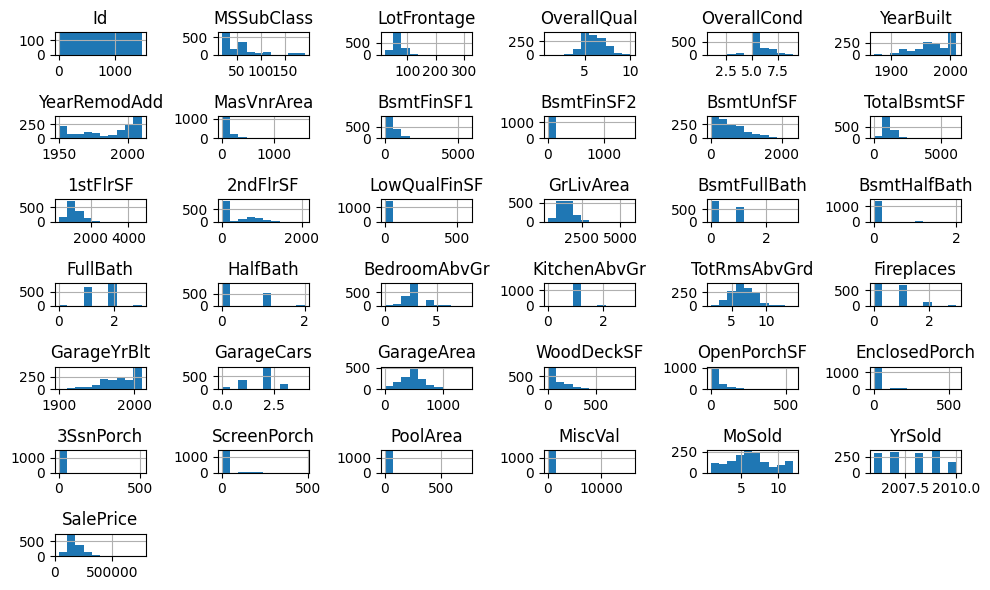

In [67]:
df.hist(figsize=(10,6))
plt.tight_layout()
plt.show()


**STEP 7: Encode Categorical Column (Location)**

In [57]:
df = pd.get_dummies(df, columns=["LotArea"], drop_first=True)


**STEP 8: Feature & Target Separation**

In [58]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]


**STEP 9: Feature Scaling (Normalization)**

In [59]:
from sklearn.preprocessing import StandardScaler

categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**STEP 10: Train-Test Split**

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


**STEP 11: Train Linear Regression Model**

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**STEP 12: Make Predictions**

In [62]:
y_pred = model.predict(X_test)


**STEP 13: Model Evaluation**

**(A) RMSE**

In [63]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 47943.33405460959


**(B) R² Score**

In [64]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.7003304399077415


**STEP 14: Compare Actual vs Predicted Prices**

In [65]:
comparison = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})

comparison.head()


,Actual Price,Predicted Price
0,154500,156466.645288
1,325000,325384.454866
2,115000,86634.873021
3,159000,148975.669523
4,315500,317691.308071


**STEP 15: Feature Importance (Coefficients)**

In [66]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients


,Feature,Coefficient
0,Id,1589.294714
1,MSSubClass,11335.791779
2,LotFrontage,2757.446913
3,OverallQual,12572.076057
4,OverallCond,4719.527092
...,...,...
1311,SaleCondition_AdjLand,-602.658198
1312,SaleCondition_Alloca,3350.909942
1313,SaleCondition_Family,571.709344
1314,SaleCondition_Normal,3643.733948


### **conclusion**
**“I built a house price prediction model using linear regression. I performed preprocessing, feature encoding, scaling, model training, and evaluation using RMSE and R² score.”**